In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import os


In [2]:
import sys 
print(sys.executable)

/home/amaithi/anaconda3/envs/ml_ops/bin/python


In [3]:
def data_load(path):
    df = pd.read_csv(path)
    return df 
    
    

In [4]:
data = data_load('../data/dataset_raw/banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [16]:
def visualize_missing_values(data):
    print("Missing Values\n")
    print(data.shape)
    print(100*(data.isna().sum())/len(data))

visualize_missing_values(data)


Missing Values

(41188, 21)
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
y                 0.0
dtype: float64


In [17]:
def drop_missing_values(data):
    data = data.dropna()
    print("After deleting missing values")
    visualize_missing_values(data)
    return data 

df1 = drop_missing_values(data)

    

After deleting missing values
Missing Values

(41188, 21)
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
y                 0.0
dtype: float64


In [17]:
import json
categorical_cols = []
numerical_cols = []

def column_collector(data):
    for col in data.columns:
        if data[col].dtype == 'O':
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    print(categorical_cols, end='\n')

    print(numerical_cols, end='\n')
    list = {
        "categorical_cols": categorical_cols,
        "numerical_cols": numerical_cols
    }
    # file = json.dumps(list)
    with open("features.json", "w") as file:
        file.write(json.dumps(list))
        file.close()



column_collector(df1)


NameError: name 'df1' is not defined

In [25]:
from pprint import pprint 
dicti = {}

for col in data.columns:
    if col == 'y':
         continue
    if data[col].dtype == 'O':
        vals = data[col].unique().tolist()
        # print(vals)
        dicti[col] = vals
        # categorical_cols.append(col)
    else:
            min_valu = data[col].min()
            max_valu = data[col].max()
            val = f"min {min_valu} max {max_valu}"
        #  print(val)
            dicti[col] = val

pprint(dicti)



{'age': 'min 17 max 98',
 'campaign': 'min 1 max 56',
 'cons_conf_idx': 'min -50.8 max -26.9',
 'cons_price_idx': 'min 92.201 max 94.767',
 'contact': ['cellular', 'telephone'],
 'day_of_week': ['thu', 'fri', 'tue', 'mon', 'wed'],
 'default': ['unknown', 'no', 'yes'],
 'duration': 'min 0 max 4918',
 'education': ['basic.4y',
               'unknown',
               'university.degree',
               'high.school',
               'basic.9y',
               'professional.course',
               'basic.6y',
               'illiterate'],
 'emp_var_rate': 'min -3.4 max 1.4',
 'euribor3m': 'min 0.634 max 5.045',
 'housing': ['yes', 'no', 'unknown'],
 'job': ['blue-collar',
         'technician',
         'management',
         'services',
         'retired',
         'admin.',
         'housemaid',
         'unemployed',
         'entrepreneur',
         'self-employed',
         'unknown',
         'student'],
 'loan': ['no', 'yes', 'unknown'],
 'marital': ['married', 'single', 'divorced',

In [9]:
print(data.columns())

TypeError: 'Index' object is not callable

In [8]:
for col in categorical_cols:
    print(f"Column Name : {col}\t")
    print(df1[col].unique(), end='\n\n')


Column Name : job	
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']

Column Name : marital	
['married' 'single' 'divorced' 'unknown']

Column Name : education	
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

Column Name : default	
['unknown' 'no' 'yes']

Column Name : housing	
['yes' 'no' 'unknown']

Column Name : loan	
['no' 'yes' 'unknown']

Column Name : contact	
['cellular' 'telephone']

Column Name : month	
['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']

Column Name : day_of_week	
['thu' 'fri' 'tue' 'mon' 'wed']

Column Name : poutcome	
['nonexistent' 'success' 'failure']



In [9]:
def preprocessing(data):
    data['education']=np.where(data['education'] == 'basic.4y', "Basic", data['education'])
    data['education']=np.where(data['education'] == 'basic.6y', "Basic", data['education'])
    data['education']=np.where(data['education'] == 'basic.9y', "Basic", data['education'])

    for var in categorical_cols:
        cat_list = 'var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1 = data.join(cat_list)
        data = data1
    data_vars=data.columns.values.tolist()
    to_keep = [i for i in data_vars if i not in categorical_cols]

    final_data = data[to_keep]

    final_data.columns = final_data.columns.str.replace('-', '_')
    final_data.columns = final_data.columns.str.replace(' ', '_')

    return final_data




In [10]:
cleaned_data = preprocessing(df1)

------------------- EDA Done ----------------

In [11]:
def train_and_test_split(data):
    from sklearn.model_selection import train_test_split 
    X = data.loc[:, data.columns != 'y']
    y = data.loc[:, data.columns == 'y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=45)

    return X_train, X_test, y_train, y_test

In [12]:
def over_sampling_target_clss(X_train, y_train):
    # Over Sampling using SMOTE 

    from imblearn.over_sampling import SMOTE 
    os = SMOTE(random_state=0)

    columns = X_train.columns
    os_data_X, os_data_y = os.fit_resample(X_train, y_train)

    os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
    os_data_y = pd.DataFrame(data = os_data_y, columns= ['y'])

    # Check the numbers of data 

    print("Length of the oversampled data is ", len(os_data_X), end='\n')
    print("Number of no subscription in oversampled data is ", len(os_data_y[os_data_y['y']==0]), end='\n')
    print("Number of subscription ", len(os_data_y[os_data_y['y']==1]), end='\n')
    print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
    print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

    X_train = os_data_X 
    y_train = os_data_y['y']

    return X_train, y_train
    
        

In [13]:
def train_basic_classifier(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)

    return model 


In [14]:
def predict_on_test_data(model, x_test):
    pred = model.predict(x_test)
    return pred 
    

In [15]:
def predict_prob_on_test_data(model, x_test):
    y_pred = model.predict_proba(x_test)
    return y_pred 

In [16]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
    
    acc = accuracy_score(y_true=y_true, y_pred=y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)

    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [17]:
def create_roc_auc_plot(clf, x_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn.metrics import RocCurveDisplay
    RocCurveDisplay.from_estimator(clf, x_data, y_data)
    plt.savefig('roc_auc_curve.png')

In [18]:
def create_confusion_matric(clf, x_test, y_test):
    import matplotlib.pyplot as plt 
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)
    plt.savefig('confusion_matrrix.png')
    

In [19]:
def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5,21,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                    # 'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 100, cv = 1, verbose=1, random_state=35, n_jobs = -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params

----------------------------------------------Model Building and Hyper Parameter Tuning-------------------

In [26]:
X_train, X_test, y_train, y_test = train_and_test_split(cleaned_data)

In [27]:
X_train, y_train = over_sampling_target_clss(X_train, y_train)

Length of the oversampled data is  51166
Number of no subscription in oversampled data is  25583
Number of subscription  25583
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [28]:
basic_model = train_basic_classifier(X_train, y_train)

In [29]:
pred = predict_on_test_data(basic_model, X_test)

In [30]:
pred_prob = predict_prob_on_test_data(basic_model, X_test)

In [31]:
get_metrics(y_test, pred, pred_prob)

{'accuracy': 0.91, 'precision': 0.62, 'recall': 0.52, 'entropy': 0.2}

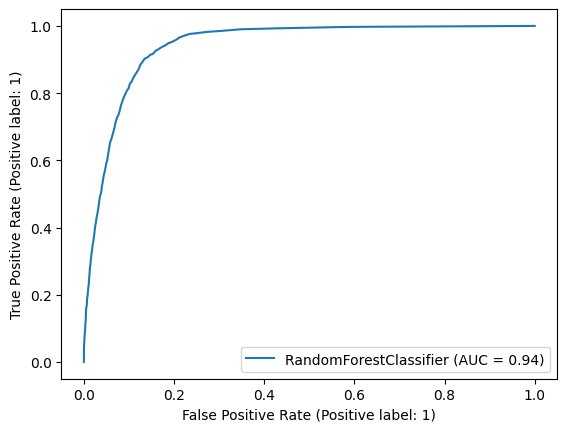

In [32]:
create_roc_auc_plot(basic_model, X_test, y_test)

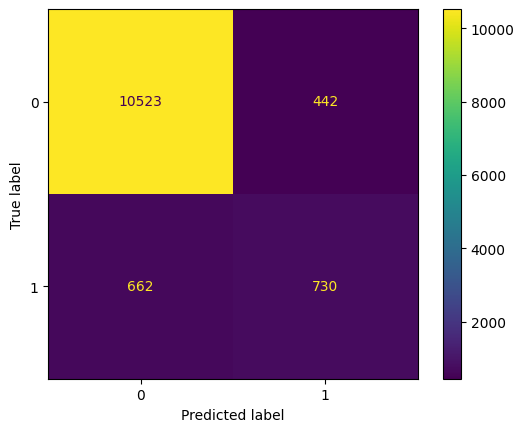

In [33]:
create_confusion_matric(basic_model, X_test, y_test)

---------------ml Flow---------------------

In [40]:
experiment_name = 'basic Classifier 123'
run_name = 'Bank dataset'
run_metrics = get_metrics(y_test, pred, pred_prob)
print(run_metrics)

{'accuracy': 0.91, 'precision': 0.62, 'recall': 0.52, 'entropy': 0.2}


In [41]:
import mlflow 

def create_experiment(experiment_name,
                        run_name,
                        run_metrics,
                        model,
                        confusion_matrix_path= None,
                        roc_auc_plot_path=None,
                        run_params=None                 
                    ):
    mlflow.set_experiment(experiment_name=experiment_name)
    
    mlflow.set_tracking_uri('http://0.0.0.0:1234')

    with mlflow.start_run():

        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])

        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")

        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')

        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")

        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})

    
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))


        

In [42]:
create_experiment(experiment_name,run_name,run_metrics,basic_model, 'confusion_matrrix.png', 'roc_auc_curve.png')

2023/05/23 13:12:01 INFO mlflow.tracking.fluent: Experiment with name 'basic Classifier 123' does not exist. Creating a new experiment.


Run - Bank dataset is logged to Experiment - basic Classifier 123


Create another experiment after tuning hyperparameters and log the best set of parameters for which model gives the optimal performance

mlflow ui -> to run the ui in the local host

In [25]:
experiment_name = "Optimized Model 1"
run_name = "Random Search CV Tuned Model 1"
model_tuned,best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params

y_pred = predict_on_test_data(model_tuned,X_test) #will return the predicted class
y_pred_prob = predict_prob_on_test_data(model_tuned,X_test) #model.predict_proba(X_test)
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)


ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [34]:
run_metrics

{'accuracy': 0.91, 'precision': 0.62, 'recall': 0.57, 'entropy': 0.2}

In [35]:
for param in run_params:
    print(param, run_params[param])

n_estimators 21
min_samples_split 10
min_samples_leaf 1
max_features auto
max_depth 110
bootstrap True


In [36]:
create_experiment(experiment_name,run_name,run_metrics,model_tuned,'confusion_matrrix.png', 'roc_auc_curve.png',run_params)

2023/05/23 10:25:13 INFO mlflow.tracking.fluent: Experiment with name 'Optimized Model' does not exist. Creating a new experiment.


Run - Random Search CV Tuned Model is logged to Experiment - Optimized Model
